## Analysing Titanic Data

In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from collections import defaultdict
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
rcParams['figure.figsize'] = (10, 5)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#survived represents whether the patient survived or not
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(df[df.Cabin.notnull() == False ]), len(df[df.Age.notnull() == False ]), len(df[df.Embarked.notnull() == False ])

(687, 177, 2)

In [5]:
df = df.drop(['Ticket', 'Cabin'], axis = 1)
#df[df.Embarked == np.nan]

In [6]:
df = df.dropna()

In [7]:
df[df.Embarked.notnull() == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


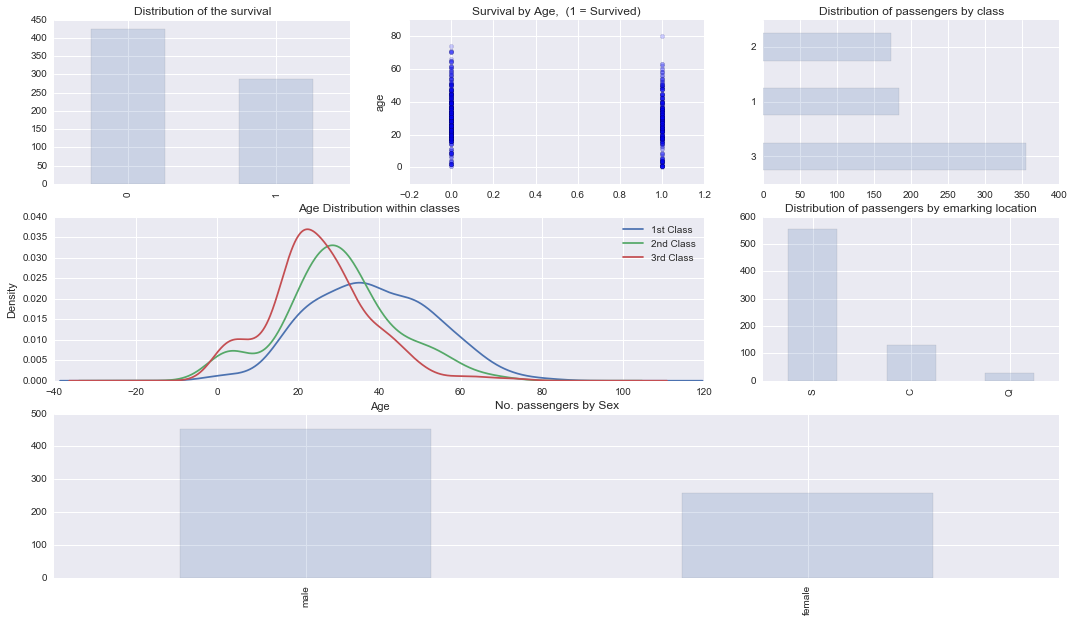

In [8]:
#adjust the figure size and set some global variables 
#subplot2grid is a new method provided by matplotlib 
#that helps in plotting graphs at different positions
fig = plt.figure(figsize=(18,10), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
ax1 = plt.subplot2grid((3,3),(0,0))
df.Survived.value_counts().plot(kind = 'bar', alpha = alpha)
plt.title("Distribution of the survival")

ax2 = plt.subplot2grid((3, 3),(0,1))
plt.scatter(df.Survived, df.Age, alpha = alpha_scatterplot)
plt.ylabel("age")
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((3, 3), (0, 2))
df.Pclass.value_counts().plot(kind = 'barh', alpha = alpha)
plt.title("Distribution of passengers by class")

ax3 = plt.subplot2grid((3, 3), (1, 0), colspan = 2)
df.Age[df.Pclass == 1].plot(kind = 'kde')
df.Age[df.Pclass == 2].plot(kind = 'kde')
df.Age[df.Pclass == 3].plot(kind = 'kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

ax4 = plt.subplot2grid((3, 3), (1, 2))
df.Embarked.value_counts().plot(kind = 'bar', alpha = alpha)
plt.title("Distribution of passengers by emarking location")

ax5 = plt.subplot2grid((3, 3), (2, 0), colspan = 3)
df.Sex.value_counts().plot(kind = 'bar', alpha = alpha)
plt.title("No. passengers by Sex")


### Now lets do some core EDA

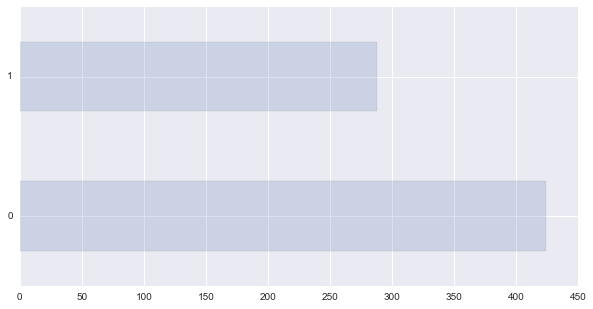

In [9]:
plt.figure(figsize=(10,5), dpi=1600) 
df.Survived.value_counts().plot(kind = 'barh', alpha = alpha)
#Obviously most of them died

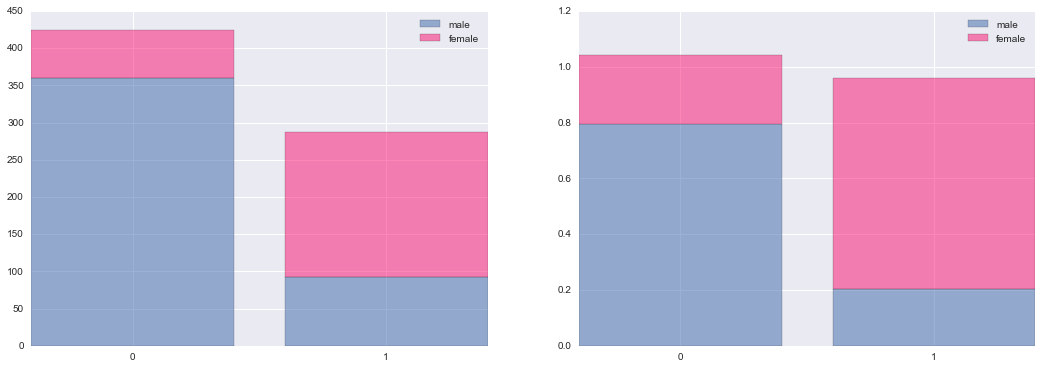

In [10]:
#Lets try to plot some stacked barplots or simply we can try to break the above 
#graph by gender
fig = plt.figure(figsize = (18, 6))
male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
female = df.Survived[df.Sex == 'female'].value_counts().sort_index()
ind = np.arange(2)
width = 0.8
ax1 = fig.add_subplot(121)
ax1.bar(ind, male, width, alpha = 0.55, label = 'male')
ax1.bar(ind, female, width, color = '#FA2379', bottom = male, alpha = 0.55, label = 'female')
plt.xticks(ind + width/2., ('0', '1'))
ax1.legend(loc = 'best')

ax2 = fig.add_subplot(122)
ax2.bar(ind, male/float(male.sum()), width, alpha = 0.55, label = 'male')
ax2.bar(ind, female/float(female.sum()), width, color = '#FA2379', bottom = male/float(male.sum()), alpha = 0.55, label = 'female')
plt.xticks(ind + width/2., ('0', '1'))
ax2.legend(loc = 'best')

Hmmm, well when the titanic was sinking, there were boats but very less, so they decided to move only the women and kids towards the boats, thats why we see that more women had survived than the males. But not only women survived, we can try analysis over the ages too, lets try to plot the survival rate between ages less than 15 and over 15. What we'll be expecting is that people aged less than 15 survived more.

<Container object of 2 artists>

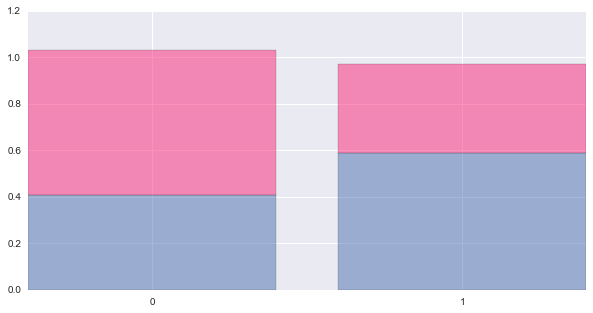

In [11]:
plt.figure()
less_15 = df.Survived[df.Age <= 15].value_counts().sort_index()
morethan_15 = df.Survived[df.Age > 15].value_counts().sort_index()
ind = np.arange(2)
width = 0.8
plt.bar(ind, less_15/float(less_15.sum()), width, alpha = 0.5)
plt.xticks(ind + width/2., ('0', '1'))
plt.bar(ind, morethan_15/float(morethan_15.sum()), width, color = '#FA2379', bottom = less_15/float(less_15.sum()), alpha = 0.5)

Hmm we saw what we expected but we also saw that the people less than 15 years of age were really less compared to the total population.... I don't think we should rely on the plot.

(0    55
 1    47
 Name: Survived, dtype: int64, 0      9
 1    148
 Name: Survived, dtype: int64, 0    215
 1     38
 Name: Survived, dtype: int64, 0    145
 1     55
 Name: Survived, dtype: int64)

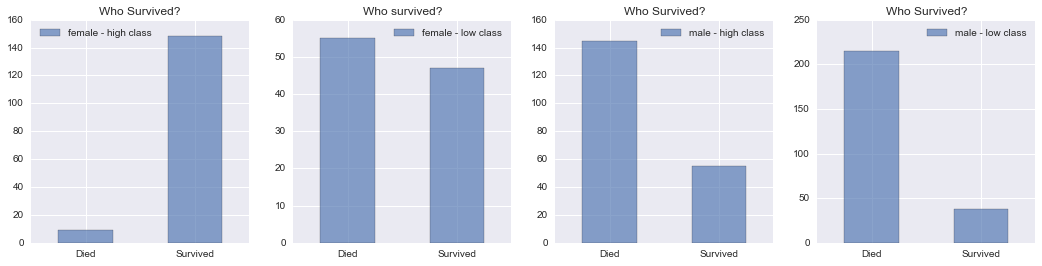

In [12]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha = 0.65

ax1 = fig.add_subplot(141)
female_highclass = df.Survived[(df.Sex == 'female') & (df.Pclass != 3)].value_counts().sort_index()
female_highclass.plot(kind = 'bar', alpha = alpha, label = 'female - high class')
ax1.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title("Who Survived?")
plt.legend(loc = 'best')

ax2 = fig.add_subplot(142)
female_lowclass = df.Survived[(df.Sex == 'female') & (df.Pclass == 3)].value_counts().sort_index()
female_lowclass.plot(kind = 'bar', alpha = alpha, label = 'female - low class')
ax2.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title("Who survived?")
plt.legend(loc = 'best')

ax3 = fig.add_subplot(143)
male_highclass = df.Survived[(df.Sex == 'male') & (df.Pclass != 3)].value_counts().sort_index()
male_highclass.plot(kind = 'bar', alpha = alpha, label = 'male - high class')
ax3.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title("Who Survived?")
plt.legend(loc = 'best')

ax4 = fig.add_subplot(144)
male_lowclass = df.Survived[(df.Sex == 'male') & (df.Pclass == 3)].value_counts().sort_index()
male_lowclass.plot(kind = 'bar', alpha = alpha, label = 'male - low class')
ax4.set_xticklabels(['Died', 'Survived'], rotation = 0)
plt.title("Who Survived?")
plt.legend(loc = 'best')

female_lowclass, female_highclass, male_lowclass, male_highclass

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:

### Supervised Machine Learning for this binary classification task

##### Logit Regression 

In [13]:
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def logit_reg(clf, x, y, params, score_func = accuracy_score, cv = 5):
    gs = GridSearchCV(clf, param_grid = params, cv = cv)
    #print (x, y)
    gs.fit(x, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    best = gs.best_estimator_
    return best
def classify(clf, df, features, target_name, params, scoring_func = accuracy_score, cv = 5, test_size = 0.1):
    subdf = df[features]
    target = df[target_name].values
    print (type(subdf), type(target))
    Xtrain, Xtest, ytrain, ytest = train_test_split(subdf, target, test_size = test_size)
    
    clf = logit_reg(clf, Xtrain, ytrain, params, score_func = scoring_func, cv = cv)
    clf.fit(Xtrain, ytrain)
    training_score = clf.score(Xtrain, ytrain)
    testing_score = clf.score(Xtest, ytest)
    confu = confusion_matrix(ytest, clf.predict(Xtest))
    return {"cldpredict" : clf.predict_proba(subdf), "TrScore" : training_score, "TsScore" : testing_score,
            "params" : clf.get_params, 'ConfusionMatrix' : confu, 'Coeff_values' : clf.coef_}, clf

In [14]:
"""
This is a binary classification task with categorical values, 
for each categorical variable we have to introduce a dummy variable. 
If the variably takes just two values we introduce 1 dummy variable. 
I general, a variable with n numbers as domain need n - 1 dummy variables 
in the regression equation.
In the following problem we have 'Sex', 'Embarked', 'Pclass' as the dummy variables 
So, we'll preprocess the data first - 
"""
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df.Sex = encoder.fit_transform(df.Sex)
df.Pclass = encoder.fit_transform(df.Pclass)
df.Embarked = encoder.fit_transform(df.Embarked)

In [15]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
features = ['Sex', 'Age', 'SibSp', 'Embarked', 'Pclass']
target = 'Survived'
params = {'C' : [1000, 100, 10, 1, 0.1, 0.01, 0.001]}
values, clf = classify(lr, df, features, target, params)
values

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
BEST {'C': 1000} 0.8109375 [mean: 0.81094, std: 0.03900, params: {'C': 1000}, mean: 0.81094, std: 0.03900, params: {'C': 100}, mean: 0.81094, std: 0.03900, params: {'C': 10}, mean: 0.80156, std: 0.04177, params: {'C': 1}, mean: 0.78125, std: 0.01626, params: {'C': 0.1}, mean: 0.69688, std: 0.02202, params: {'C': 0.01}, mean: 0.58437, std: 0.00195, params: {'C': 0.001}]


{'Coeff_values': array([[-2.60866363, -0.04423552, -0.41091791, -0.11485148, -1.2704918 ]]),
 'ConfusionMatrix': array([[44,  6],
        [ 9, 13]]),
 'TrScore': 0.8046875,
 'TsScore': 0.79166666666666663,
 'cldpredict': array([[ 0.91176447,  0.08823553],
        [ 0.08816815,  0.91183185],
        [ 0.37583432,  0.62416568],
        ..., 
        [ 0.03363743,  0.96636257],
        [ 0.33865576,  0.66134424],
        [ 0.90481928,  0.09518072]]),
 'params': <bound method BaseEstimator.get_params of LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False)>}

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [17]:
#Now doing the same using different library...
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from patsy import dmatrices

In [18]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
results = {} 

In [19]:
#fitting the data
y,x = dmatrices(formula, data=df, return_type='dataframe')
model = sm.Logit(y,x)
res = model.fit()
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 12 Jul 2016   Pseudo R-squ.:                  0.3414
Time:                        02:04:50   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.1]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.2]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.1]         -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.1]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.2]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

(712, 712)

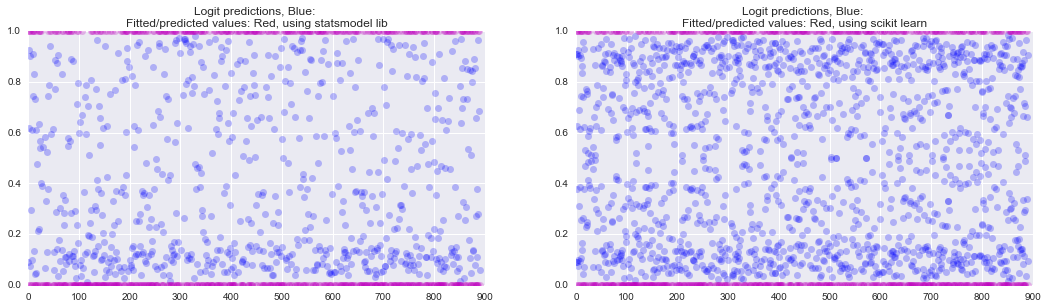

In [20]:
fig = plt.figure(figsize=(18,10), dpi=1600) 

ax1 = plt.subplot2grid((2, 2), (0, 0))
ypred = res.predict(x)
ax1.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red, using statsmodel lib');

ax2 = plt.subplot2grid((2, 2), (0, 1))
ypred_scikitlearn = values['cldpredict']
ax2.plot(x.index, ypred_scikitlearn,  'bo', x.index, y, 'mo', alpha=.25)
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red, using scikit learn');
data = y.values - ypred_scikitlearn[:, 0]

#ax3 = plt.subplot2grid((2, 2), (1, 0))
#ax2.plot(x.index,  )
len(ypred), len(ypred_scikitlearn)


In [21]:
test_data = pd.read_csv("test.csv")

In [22]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test_data['Survived'] = 1.23

In [24]:
survived = test_data['Survived']
test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Survived']]
test_data.head()

,Pclass,Sex,Age,SibSp,Embarked,Survived
0,3,male,34.5,0,Q,1.23
1,3,female,47.0,1,S,1.23
2,2,male,62.0,0,Q,1.23
3,3,male,27.0,0,S,1.23
4,3,female,22.0,1,S,1.23


In [25]:
test_data = test_data.dropna()

In [26]:
test_data.Sex = encoder.fit_transform(test_data.Sex)
test_data.Pclass = encoder.fit_transform(test_data.Pclass)
test_data.Embarked = encoder.fit_transform(test_data.Embarked)
#clf.predict(test_data)

In [27]:
y,x = dmatrices(formula, data=test_data, return_type='dataframe')

In [28]:
predictions = np.asarray([1 if i > 0.5 else 0 for i in res.predict(x)])

In [29]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0,

### Support Vector Machines 

/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


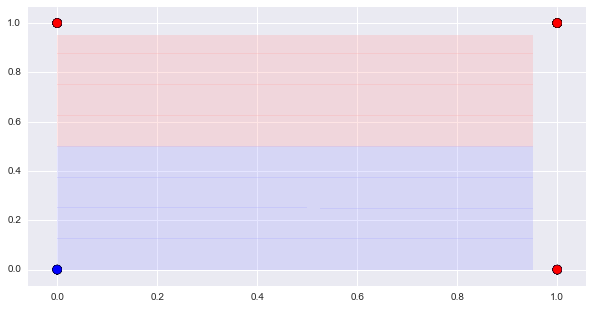

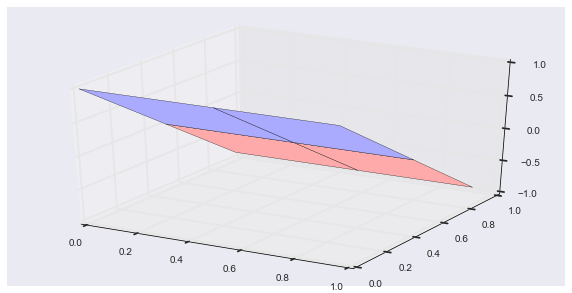

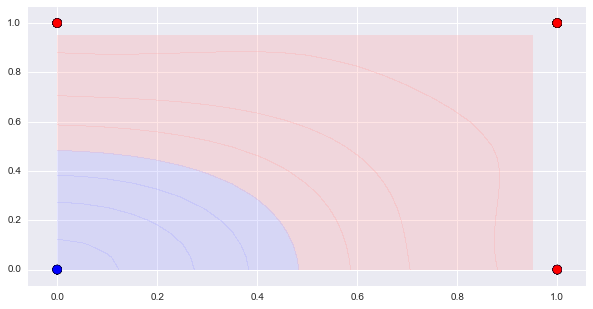

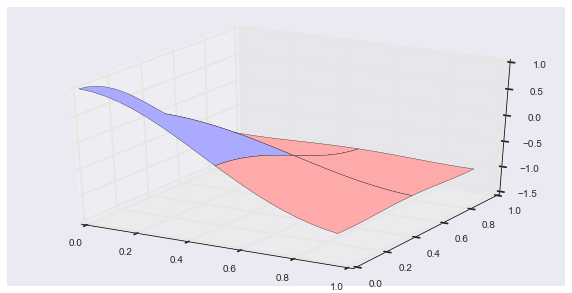

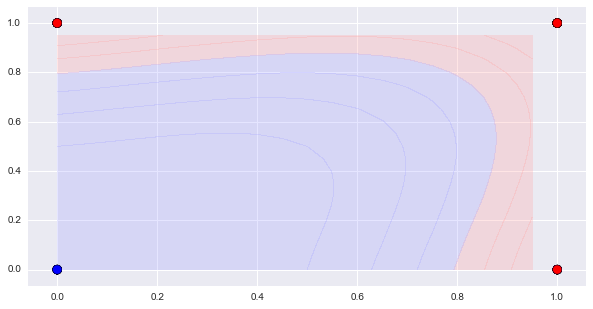

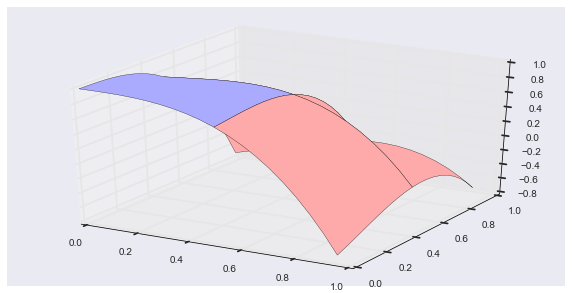

In [46]:
#I'll try to do it using 2 ways, with and without using patsy 
#first using normal method
from matplotlib.colors import ListedColormap
from sklearn import svm 
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
kernel = ['linear', 'rbf', 'poly']
features = ['Sex', 'Age']
#subdf = df[features]
#subdf_res = df['Survived']
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'
subdf_res, subdf = dmatrices(formula_ml, data=df, return_type='matrix')

feature_1 = 2
feature_2 = 3

subdf = np.asarray(subdf)
subdf = subdf[:,[feature_1, feature_2]]  

Xtrain, Xtest, Ytrain, Ytest = train_test_split(subdf, subdf_res, test_size = 0.1)
for fignum, kernel in enumerate(kernel):
    plt.figure()
    #plt.axis(tight)
    
    clf = svm.SVC(kernel = kernel, gamma = 3)
    #fit the model using the training data 
    clf.fit(Xtrain, Ytrain)
    #plotting the decision boundary 
    xmin, xmax = Xtrain[:, 0].min(), Xtrain[:, 0].max()
    ymin, ymax = Xtrain[:, 1].min(), Xtrain[:, 1].max()
    skip = 0.05
    xx, yy = np.meshgrid(np.arange(xmin, xmax, skip), np.arange(ymin, ymax, skip))
    #plot the training data 
    #plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain - 1, zorder=10, cmap=cmap_bold, label = "Train data")
    #plot the test data as well
    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest - 1, s = 80, zorder=10, cmap=cmap_bold, label = "Test data")
    #plotting the colormesh 
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape( xx.shape )
    plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    ax.plot_surface(xx, yy, Z, cmap = cmap_light)
    plt.legend(loc = 'best')
    